<a href="https://colab.research.google.com/github/satani99/practical_deep_learning_for_coders/blob/main/fast_ai_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)

In [2]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/annotations'),Path('/root/.fastai/data/oxford-iiit-pet/images')]

In [3]:
(path/'images').ls()

(#7393) [Path('/root/.fastai/data/oxford-iiit-pet/images/Persian_98.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_59.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/pug_69.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/shiba_inu_154.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/scottish_terrier_116.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/english_cocker_spaniel_162.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Russian_Blue_78.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Bombay_83.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_193.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/samoyed_150.jpg')...]

In [4]:
fname = (path/'images').ls()[0]

In [5]:
print(fname)
import re

/root/.fastai/data/oxford-iiit-pet/images/Persian_98.jpg


In [6]:
re.findall(r'(.+)_\d+.jpg$', fname.name)

['Persian']

In [7]:
pets = DataBlock(blocks=(ImageBlock, CategoryBlock),
                 get_items = get_image_files,
                 splitter = RandomSplitter(seed=42),
                 get_y = using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms = Resize(460),
                 batch_tfms = aug_transforms(size=224, min_scale=0.75))

dls = pets.dataloaders(path/'images')

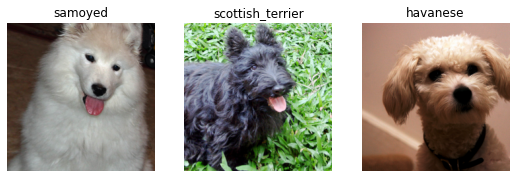

In [8]:
dls.show_batch(nrows=1, ncols=3)

In [9]:
learn = cnn_learner(dls, resnet18, metrics=accuracy)
learn.fine_tune(2)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:287: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download

  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,1.638080,0.368600,0.880920,01:18


epoch,train_loss,valid_loss,accuracy,time
0,0.583416,0.301023,0.896482,01:16
1,0.384804,0.248429,0.920839,01:16


In [10]:
x, y = dls.one_batch()

In [11]:
y

TensorCategory([34, 16, 25, 16, 22, 35,  5, 34, 33, 32, 10,  9, 23, 14, 19,  2,
                 2,  4, 12, 17, 22, 21, 36, 36,  2,  2,  7, 25, 23, 30,  9, 17,
                20, 17,  0, 25, 14, 14, 21,  2, 26, 28,  5, 10, 30,  7, 26, 14,
                 3, 35, 33, 26,  3, 22, 30, 28,  6, 21,  4,  2, 29,  4, 11, 14],
               device='cuda:0')

In [12]:
preds, _ = learn.get_preds(dl=[(x, y)])
preds[0]

TensorBase([1.4957e-08, 7.9857e-08, 1.0980e-06, 4.6429e-06, 9.0986e-06,
            6.0492e-07, 4.2723e-07, 1.0806e-06, 4.0951e-07, 3.9516e-06,
            5.5414e-06, 6.0789e-06, 4.3646e-04, 1.4859e-03, 7.6702e-08,
            2.1535e-07, 9.1974e-06, 1.2659e-06, 4.9382e-06, 5.9962e-08,
            8.1576e-05, 8.2262e-07, 3.5731e-06, 2.4043e-07, 2.6762e-06,
            3.2633e-07, 3.2529e-06, 2.6485e-05, 1.8698e-07, 1.6201e-05,
            2.2107e-07, 2.2364e-07, 7.6622e-05, 3.8949e-07, 9.9782e-01,
            6.6873e-08, 4.2089e-07])

In [13]:
len(preds[0]), preds[0].sum()

(37, TensorBase(1.0000))

In [14]:
acts = torch.randn((6, 2))*2
acts

tensor([[-1.1590,  0.4517],
        [ 2.2823,  0.2790],
        [-2.9664,  0.5550],
        [-0.7854,  1.0817],
        [-1.3176,  0.3735],
        [ 2.9759,  0.3029]])

In [15]:
acts.sigmoid()

tensor([[0.2389, 0.6110],
        [0.9074, 0.5693],
        [0.0490, 0.6353],
        [0.3132, 0.7468],
        [0.2112, 0.5923],
        [0.9515, 0.5752]])

In [16]:
(acts[:,0]-acts[:,1]).sigmoid()

tensor([0.1665, 0.8811, 0.0287, 0.1339, 0.1556, 0.9354])

In [17]:
def softmax(x): return exp(x) / exp(x).sum(dim=1, keepdim=True)

In [18]:
sm_acts = torch.softmax(acts, dim=1)
sm_acts

tensor([[0.1665, 0.8335],
        [0.8811, 0.1189],
        [0.0287, 0.9713],
        [0.1339, 0.8661],
        [0.1556, 0.8444],
        [0.9354, 0.0646]])

In [19]:
def mnist(inputs, targets):
  inputs = inputs.sigmoid()
  return torch.where(targets==1, 1-inputs, inputs).mean()

In [20]:
targ = tensor([0, 1, 0, 1, 1, 0])

In [21]:
sm_acts

tensor([[0.1665, 0.8335],
        [0.8811, 0.1189],
        [0.0287, 0.9713],
        [0.1339, 0.8661],
        [0.1556, 0.8444],
        [0.9354, 0.0646]])

In [22]:
idx = range(6)
sm_acts[idx, targ]

tensor([0.1665, 0.1189, 0.0287, 0.8661, 0.8444, 0.9354])

In [23]:
-sm_acts[idx, targ]

tensor([-0.1665, -0.1189, -0.0287, -0.8661, -0.8444, -0.9354])

In [24]:
F.nll_loss(sm_acts, targ, reduction='none')

tensor([-0.1665, -0.1189, -0.0287, -0.8661, -0.8444, -0.9354])

In [25]:
loss_func = nn.CrossEntropyLoss()

In [26]:
loss_func(acts, targ)

tensor(1.3088)

In [27]:
F.cross_entropy(acts, targ)

tensor(1.3088)

In [28]:
nn.CrossEntropyLoss(reduction='none')(acts, targ)

tensor([1.7928, 2.1298, 3.5506, 0.1437, 0.1692, 0.0668])

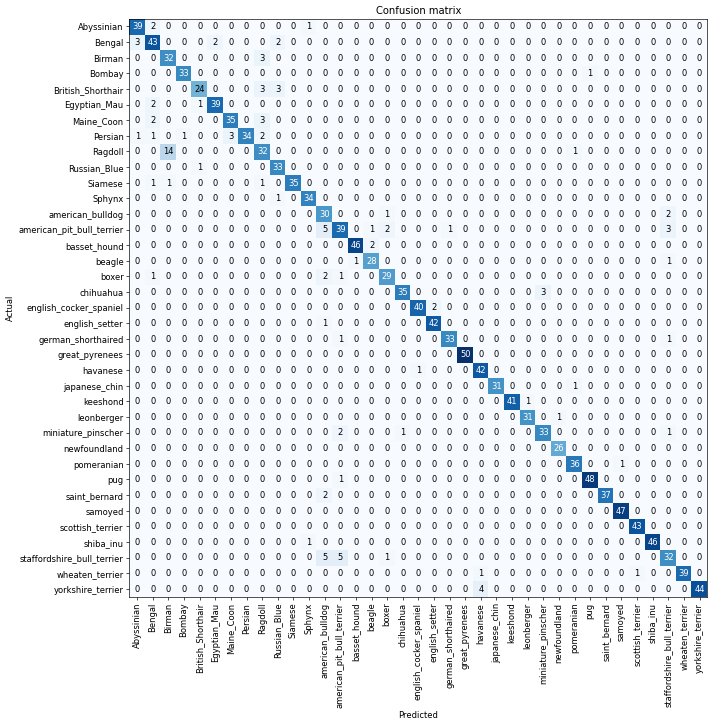

In [29]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12, 12), dpi=60)

In [30]:
interp.most_confused(min_val=5)

[('Ragdoll', 'Birman', 14),
 ('american_pit_bull_terrier', 'american_bulldog', 5),
 ('staffordshire_bull_terrier', 'american_bulldog', 5),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 5)]

In [31]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1, base_lr=0.1)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:287: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download

  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,2.754564,5.295444,0.514885,01:18


epoch,train_loss,valid_loss,error_rate,time
0,3.491101,2.336888,0.535183,01:21


/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:287: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


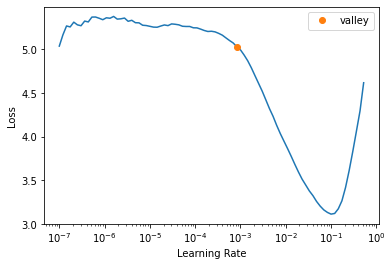

In [32]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
lr_min = learn.lr_find()

In [33]:
print(f"Minimum/10: {lr_min}")

Minimum/10: SuggestedLRs(valley=0.0008317637839354575)


In [34]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2, base_lr=3e-3)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:287: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.289967,0.298438,0.102842,01:18


epoch,train_loss,valid_loss,error_rate,time
0,0.515819,0.393973,0.114344,01:20
1,0.335480,0.237748,0.082544,01:21


In [37]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:287: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.117688,0.343322,0.114344,01:20
1,0.524335,0.238773,0.072395,01:18
2,0.331535,0.211541,0.071719,01:18


In [38]:
learn.unfreeze()

SuggestedLRs(valley=9.999999747378752e-06)

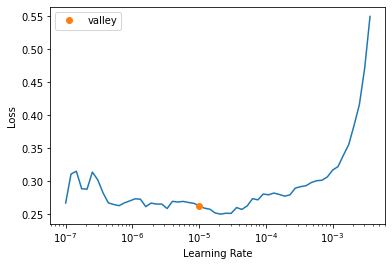

In [39]:
learn.lr_find()

In [40]:
learn.fit_one_cycle(6, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.254536,0.197656,0.060893,01:21
1,0.254542,0.190686,0.054804,01:21
2,0.220456,0.179478,0.054127,01:20
3,0.185958,0.181650,0.056834,01:20
4,0.188580,0.178916,0.054804,01:20
5,0.197056,0.176928,0.051421,01:20


In [41]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(3, 3e-3)
learn.unfreeze()
learn.fit_one_cycle(12, lr_max=slice(1e-6, 1e-4))

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:287: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.112686,0.344470,0.115697,01:18
1,0.542986,0.230280,0.074425,01:17
2,0.325757,0.221184,0.075101,01:24


epoch,train_loss,valid_loss,error_rate,time
0,0.257807,0.215732,0.075101,01:20
1,0.255678,0.208405,0.072395,01:21
2,0.240743,0.198588,0.068336,01:21
3,0.207347,0.191841,0.065629,01:21
4,0.193765,0.189940,0.067659,01:21
5,0.183918,0.191050,0.067659,01:21
6,0.150669,0.194536,0.066306,01:20
7,0.145984,0.197413,0.066306,01:20
8,0.148094,0.195662,0.064276,01:19
9,0.137955,0.194102,0.063599,01:20


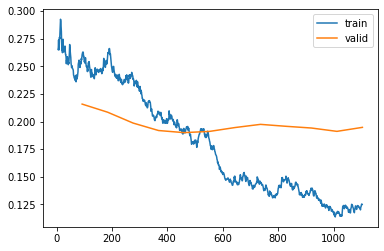

In [42]:
learn.recorder.plot_loss()